In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data5=pd.read_csv(r"C:\Users\HP\Downloads\archive (17)\heart.csv")
data5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#checking shape
data5.shape

(1025, 14)

In [4]:
#checking null values
data5.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

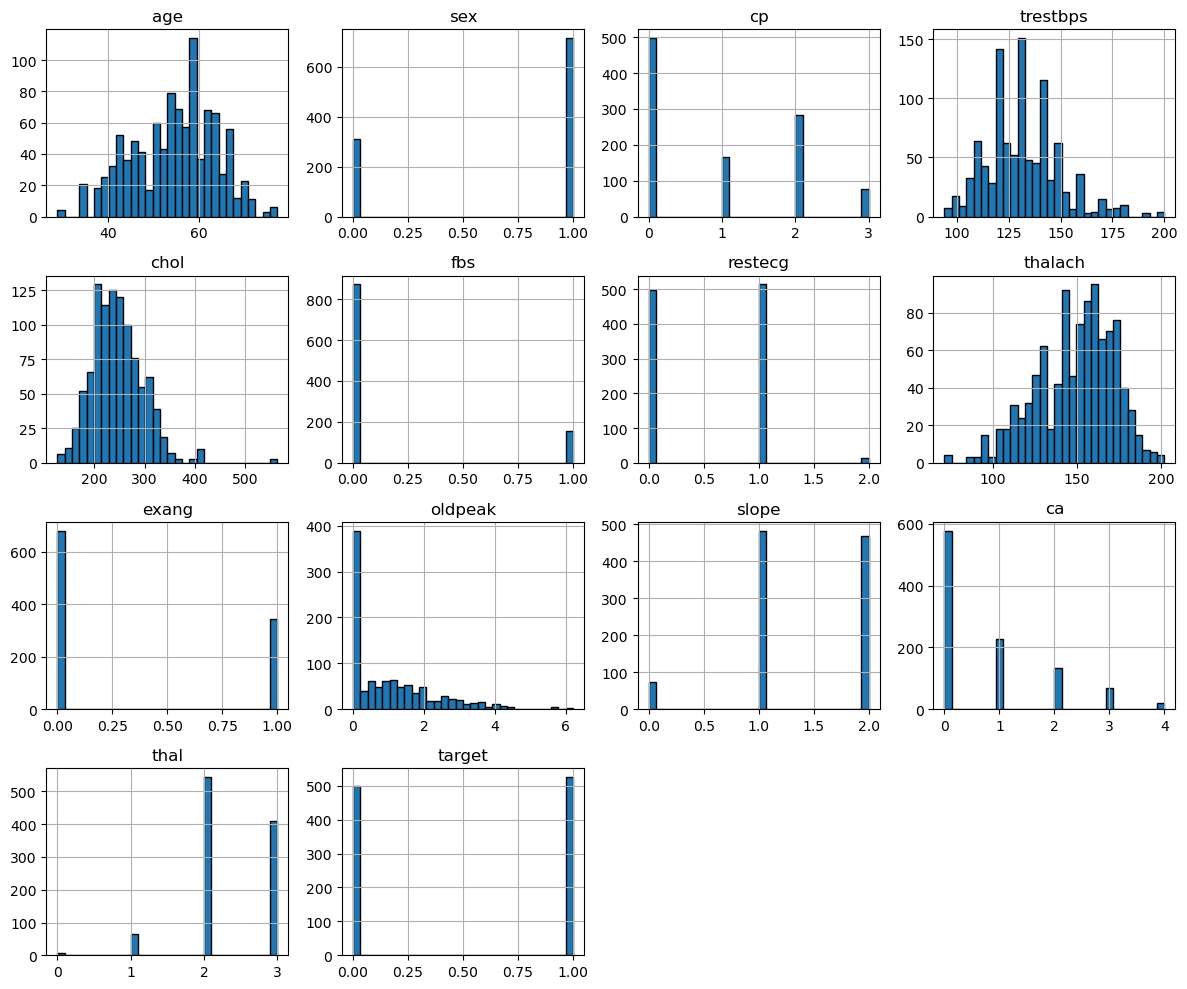

In [5]:
#histogram for all numeric columns
data5.hist(figsize=(12,10),bins=30,edgecolor='black')
plt.tight_layout()
plt.savefig("histogram for all numeric columns for heart disease.png")

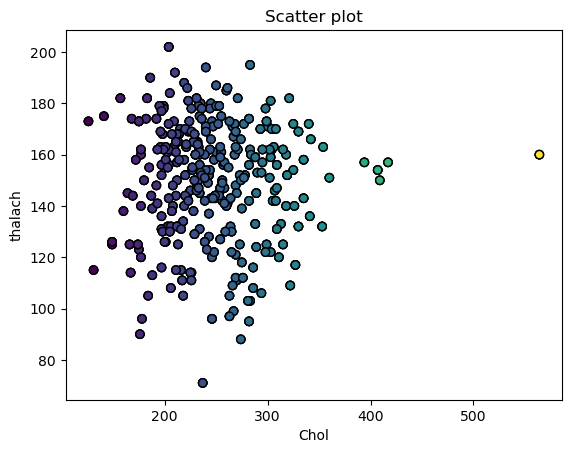

In [6]:
# Scatter plot between column chol and thalach
plt.scatter(x=data5['chol'],y=data5['thalach'],c=data5['chol'],edgecolors='k',cmap='viridis')
plt.xlabel('Chol')
plt.ylabel('thalach')
plt.title('Scatter plot')
plt.savefig('Scatter plot chol and thalach.png')

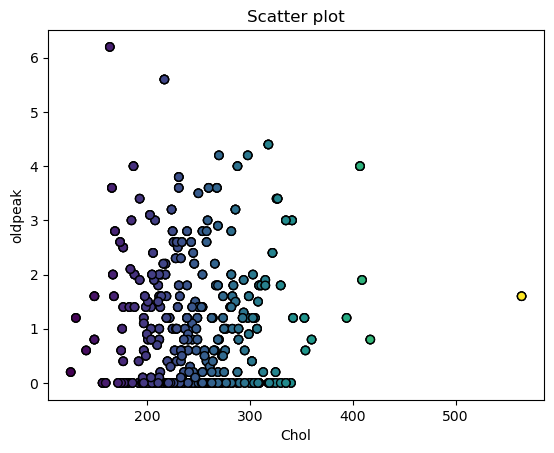

In [7]:
# Scatter plot between column chol and thalach
plt.scatter(x=data5['chol'],y=data5['oldpeak'],c=data5['chol'],edgecolors='k',cmap='viridis')
plt.xlabel('Chol')
plt.ylabel('oldpeak')
plt.title('Scatter plot')
plt.savefig('Scatter plot chol and oldpeak.png')

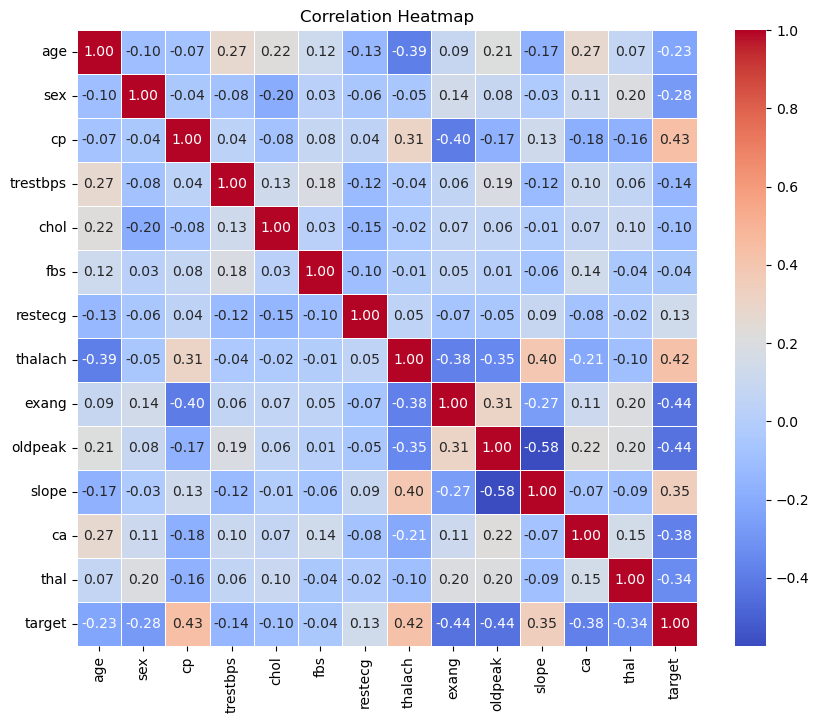

In [8]:
corr=data5.corr(numeric_only=True)
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig("heatmap for numeric data.png")

In [9]:
#separating target and input
X=data5.drop('target',axis=1)
y=data5['target']

In [10]:
#input
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [11]:
#target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [12]:
#Splitting Data into Training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred=dt.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve
accuracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
fpr,tpr,_=roc_curve(y_test,y_pred)

In [16]:
print('Accuracy is ',accuracy)
print('Confusion matrix is ',matrix)

Accuracy is  0.9853658536585366
Confusion matrix is  [[102   0]
 [  3 100]]


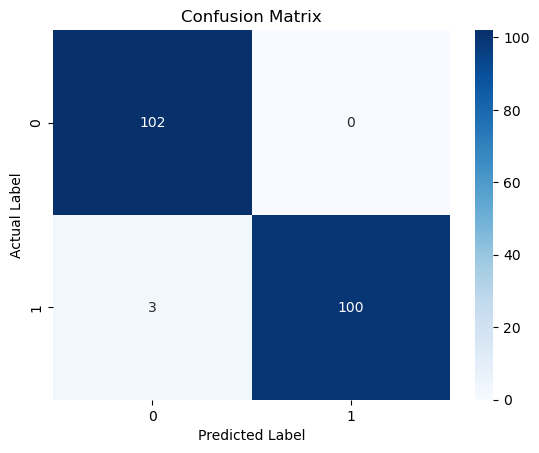

In [17]:
sns.heatmap(matrix,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.savefig('Confusion matrix using decision tree.png')

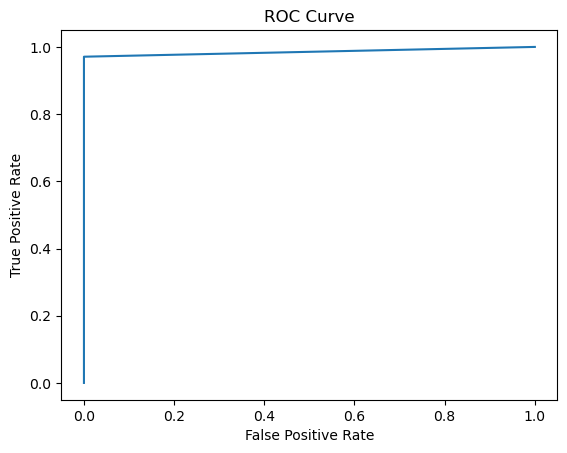

In [18]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('Roc Curve using decision tree.png')

In [19]:
#logistic regression model training
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced',max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [20]:
y_pred2=lr.predict(X_test)

In [21]:
#evaluating
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve
print('Accuracy ',accuracy_score(y_test,y_pred2))
print('Precision ',precision_score(y_test,y_pred2))
print('recall ',recall_score(y_test,y_pred2))
print('F1 score ',f1_score(y_test,y_pred2))
matrix2=confusion_matrix(y_test,y_pred2)
print('Confusion matrix is ',matrix2)
fpr2,tpr2,_=roc_curve(y_test,y_pred2)

Accuracy  0.7902439024390244
Precision  0.7542372881355932
recall  0.8640776699029126
F1 score  0.8054298642533937
Confusion matrix is  [[73 29]
 [14 89]]


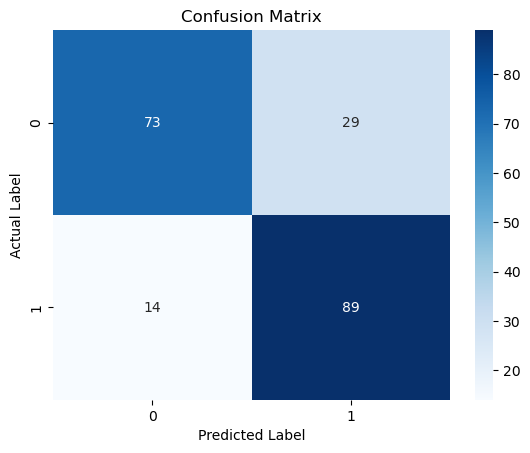

In [22]:
sns.heatmap(matrix2,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.savefig('Confusion matrix using logistic regression.png')

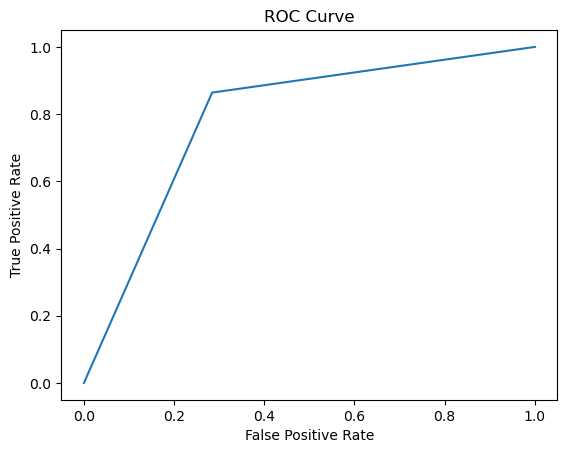

In [23]:
plt.plot(fpr2,tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('Roc Curve using logistic regression.png')

In [24]:
#Coffiecient for feature importance
coef=lr.coef_[0]
coef

array([ 2.83027769e-04, -1.73305376e+00,  8.47015502e-01, -1.82040950e-02,
       -9.00799518e-03, -1.60601309e-01,  2.56456502e-01,  2.91365610e-02,
       -8.27069509e-01, -6.76079544e-01,  5.41562041e-01, -8.19700322e-01,
       -1.07091773e+00])

In [25]:
features = X_train.columns
feat_imp=pd.DataFrame({
    'Feature': features,
    'Coefficient': coef,
    'Absolute Importance': np.abs(coef)
})
feat_imp=feat_imp.sort_values(by='Absolute Importance',ascending=False,ignore_index=True)
feat_imp

,Feature,Coefficient,Absolute Importance
0,sex,-1.733054,1.733054
1,thal,-1.070918,1.070918
2,cp,0.847016,0.847016
3,exang,-0.827070,0.827070
4,ca,-0.819700,0.819700
5,oldpeak,-0.676080,0.676080
6,slope,0.541562,0.541562
7,restecg,0.256457,0.256457
8,fbs,-0.160601,0.160601
9,thalach,0.029137,0.029137
